<a href="https://colab.research.google.com/github/ktichola/ML-and-DL-to-Gravitational-waves-analysis/blob/main/Pulsars_Classification_with_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'pulsar-dataset-htru2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1090054%2F1833828%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T091938Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7b858e1b0f76cb99822f2a157b917c7dc54a367cd91490f7e8863eb84721fb084e9c90310c0e8ced75bc98350ff188bf26f51e2b186d706d1e2f6677d4756f7aa5b0abd6db053e0422c984464a0440ffc5db9f8415d68b1c8873e9d8d457cf9cc2d4053e36c2cf50a7aafc220f4c369ceb9b3f4f43dc11ac1b9031ce787dd6ede18486a5785b1b7476397c1f07db91ba32c7181646ad754469623d201c933c879eac52319d8432342ce9b124e928e6c28619a6b16fc5856f38a072802fa48937bf99e126d699853183f4d67b6bdadf5065694c8574207cb2fa8901449eac880a7d8c8b35b786cec0637a91e03072a7b83f1d0b2b131d9bd4fa69e54a82d674b0'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# Pulsars Classification with Random Forest

## About the project

To expand our knowledge of astrophysics, the study of Pulsars is essential to understand the formation of neutron stars and resulting black holes.

The database was obtained through the HTRU (High Time Resolution Universe), an all-sky survey for pulsars and radio transients at a frequency of 1400 MHz.

The Southern Hemisphere is being observed with the Parkes Multi-Beam system, the Northern Hemisphere is being observed with the Effelsberg 7-beam system. It is expected that the survey sensitivity will be similar for both hemispheres. (see https://www.mpifr-bonn.mpg.de/research/fundamental/htru)

##### Through this project we will identify patterns in the data obtained by HTRU, and create a prediction model that classifies electromagnetic pulses as Pulsars or Non-Pulsars.

## What is a Pulsar?


Pulsars are born at the process of the death of a star, when the star can't handle it owns density and implodes into a neutron star, rapidly rotating and emiting pulses.

Pulsars are incredibly dense, the pulses emitted appear primarily in the form of radio waves, but also in other wavelengths like X-rays and gamma rays. These beams of radiation are observed on Earth as regular pulses, hence the name "pulsar."


## About Dataset

Author: Rob Lyon, School of Computer Science & Jodrell Bank Centre for Astrophysics,
		University of Manchester, Kilburn Building, Oxford Road, Manchester M13 9PL.

Contact:	rob@scienceguyrob.com or robert.lyon@.manchester.ac.uk
Web:		http://www.scienceguyrob.com or http://www.cs.manchester.ac.uk
			or alternatively http://www.jb.man.ac.uk
******************************************************************************************

1. Overview

	HTRU2 is a data set which describes a sample of pulsar candidates collected during the
	High Time Resolution Universe Survey (South) [1].

	Pulsars are a rare type of Neutron star that produce radio emission detectable here on
	Earth. They are of considerable scientific interest as probes of space-time, the inter-
	stellar medium, and states of matter (see [2] for more uses).

	As pulsars rotate, their emission beam sweeps across the sky, and when this crosses
	our line of sight, produces a detectable pattern of broadband radio emission. As pulsars
	rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking
	for periodic radio signals with large radio telescopes.

	Each pulsar produces a slightly different emission pattern, which varies slightly with each
	rotation (see [2] for an introduction to pulsar astrophysics to find out why). Thus a
	potential signal detection known as a 'candidate', is averaged over many rotations of the
	pulsar, as determined by the length of an observation. In the absence of additional info,
	each candidate could potentially describe a real pulsar. However in practice almost all
	detections are caused by radio frequency interference (RFI) and noise, making legitimate
	signals hard to find.

	Machine learning tools are now being used to automatically label pulsar candidates to
	facilitate rapid analysis. Classification systems in particular are being widely adopted,
	(see [4,5,6,7,8,9]) which treat the candidate data sets  as binary classification problems.
	Here the legitimate pulsar examples are a minority positive class, and spurious examples
	the majority negative class. At present multi-class labels are unavailable, given the
	costs associated with data annotation.

	The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639
	real pulsar examples. These examples have all been checked by human annotators. Each
	candidate is described by 8 continuous variables. The first four are simple statistics
	obtained from the integrated pulse profile (folded profile). This is an array of continuous
	variables that describe a longitude-resolved version of the signal that has been averaged
	in both time and frequency (see [3] for more details). The remaining four variables are
	similarly obtained from the DM-SNR curve (again see [3] for more details). These are
	summarised below:

	1. Mean of the integrated profile.
	2. Standard deviation of the integrated profile.
	3. Excess kurtosis of the integrated profile.
	4. Skewness of the integrated profile.
	5. Mean of the DM-SNR curve.
	6. Standard deviation of the DM-SNR curve.
	7. Excess kurtosis of the DM-SNR curve.
	8. Skewness of the DM-SNR curve.

	HTRU 2 Summary

	17,898 total examples.
	1,639 positive examples.
	16,259 negative examples.


	The data is presented in two formats: CSV and ARFF (used by the WEKA data mining tool).
	Candidates are stored in both files in separate rows. Each row lists the variables first,
	and the class label is the final entry. The class labels used are 0 (negative) and 1
	(positive).

	Please not that the data contains no positional information or other astronomical details. It is
	simply feature data extracted from candidate files using the PulsarFeatureLab tool (see [10]).

2. Citing our work

	If you use the dataset in your work please cite us using the DOI of the dataset, and the paper:

	R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar
	Candidate Selection: From simple filters to a new principled real-time classification approach
	MNRAS, 2016.

3. Acknowledgements

	This data was obtained with the support of grant EP/I028099/1 for the University of Manchester
	Centre for Doctoral Training in Computer Science, from the UK Engineering and Physical Sciences
	Research Council (EPSRC). The raw observational data was collected by the High Time Resolution
	Universe Collaboration using the Parkes Observatory, funded by the Commonwealth of Australia and
	managed by the CSIRO.

4. References

	[1] M.~J. Keith et al., "The High Time Resolution Universe Pulsar Survey - I. System Configuration
	    and Initial Discoveries",2010, Monthly Notices of the Royal Astronomical Society, vol. 409,
	    pp. 619-627. DOI: 10.1111/j.1365-2966.2010.17325.x

	[2] D. R. Lorimer and M. Kramer, "Handbook of Pulsar Astronomy", Cambridge University Press, 2005.

	[3] R. J. Lyon, "Why Are Pulsars Hard To Find?", PhD Thesis, University of Manchester, 2015.

	[4] R. J. Lyon et al., "Fifty Years of Pulsar Candidate Selection: From simple filters to a new
		principled real-time classification approach", Monthly Notices of the Royal Astronomical Society,
		submitted.

	[5] R. P. Eatough et al., "Selection of radio pulsar candidates using artificial neural networks",
		Monthly Notices of the Royal Astronomical Society, vol. 407, no. 4, pp. 2443-2450, 2010.

	[6] S. D. Bates et al., "The high time resolution universe pulsar survey vi. an artificial neural
		network and timing of 75 pulsars", Monthly Notices of the Royal Astronomical Society, vol. 427,
		no. 2, pp. 1052-1065, 2012.

	[7] D. Thornton, "The High Time Resolution Radio Sky", PhD thesis, University of Manchester,
		Jodrell Bank Centre for Astrophysics School of Physics and Astronomy, 2013.

	[8] K. J. Lee et al., "PEACE: pulsar evaluation algorithm for candidate extraction a software package
		for post-analysis processing of pulsar survey candidates", Monthly Notices of the Royal Astronomical
		Society, vol. 433, no. 1, pp. 688-694, 2013.

	[9] V. Morello et al., "SPINN: a straightforward machine learning solution to the pulsar candidate
		selection problem", Monthly Notices of the Royal Astronomical Society, vol. 443, no. 2,
		pp. 1651-1662, 2014.

	[10] R. J. Lyon, "PulsarFeatureLab", 2015, https://dx.doi.org/10.6084/m9.figshare.1536472.v1.


# Exploratory Data Analysis


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/kaggle/input/pulsar-dataset-htru2/HTRU_2.csv', header=None)
df.columns = ['IpMean', 'IpDev', 'IpKurt','IpSkew', 'DMMean', 'DMDev', 'DMKurt', 'DMSkew', 'Class']
df.head()

,IpMean,IpDev,IpKurt,IpSkew,DMMean,DMDev,DMKurt,DMSkew,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
df.shape

(17898, 9)

In [ ]:
# IpSkew
print('1:\n',df['IpSkew'].loc[df['Class'] == 1].describe())
print('0:\n',df['IpSkew'].loc[df['Class'] == 0].describe())

1:
 count    1639.000000
mean       15.553576
std        13.997200
min        -1.139069
25%         3.805492
50%        11.609644
75%        24.881853
max        68.101622
Name: IpSkew, dtype: float64
0:
 count    16259.000000
mean         0.380844
std          1.027791
min         -1.791886
25%         -0.221980
50%          0.124107
75%          0.663383
max         24.872429
Name: IpSkew, dtype: float64


In [ ]:
# IpKurt
print('1:\n',df['IpKurt'].loc[df['Class'] == 1].describe())
print('0:\n',df['IpKurt'].loc[df['Class'] == 0].describe())

1:
 count    1639.000000
mean        3.130655
std         1.872861
min        -0.094888
25%         1.556038
50%         2.961258
75%         4.586930
max         8.069522
Name: IpKurt, dtype: float64
0:
 count    16259.000000
mean         0.210440
std          0.334606
min         -1.876011
25%          0.008650
50%          0.186665
75%          0.392892
max          4.785786
Name: IpKurt, dtype: float64


In [ ]:
# IpDev
print('1:\n',df['IpDev'].loc[df['Class'] == 1].describe())
print('0:\n',df['IpDev'].loc[df['Class'] == 0].describe())

1:
 count    1639.000000
mean       38.710598
std         8.033614
min        24.772042
25%        32.284803
50%        37.341297
75%        43.759278
max        83.796909
Name: IpDev, dtype: float64
0:
 count    16259.000000
mean        47.339741
std          6.182929
min         28.698714
25%         43.384645
50%         47.485647
75%         51.315620
max         98.778911
Name: IpDev, dtype: float64


<Axes: >

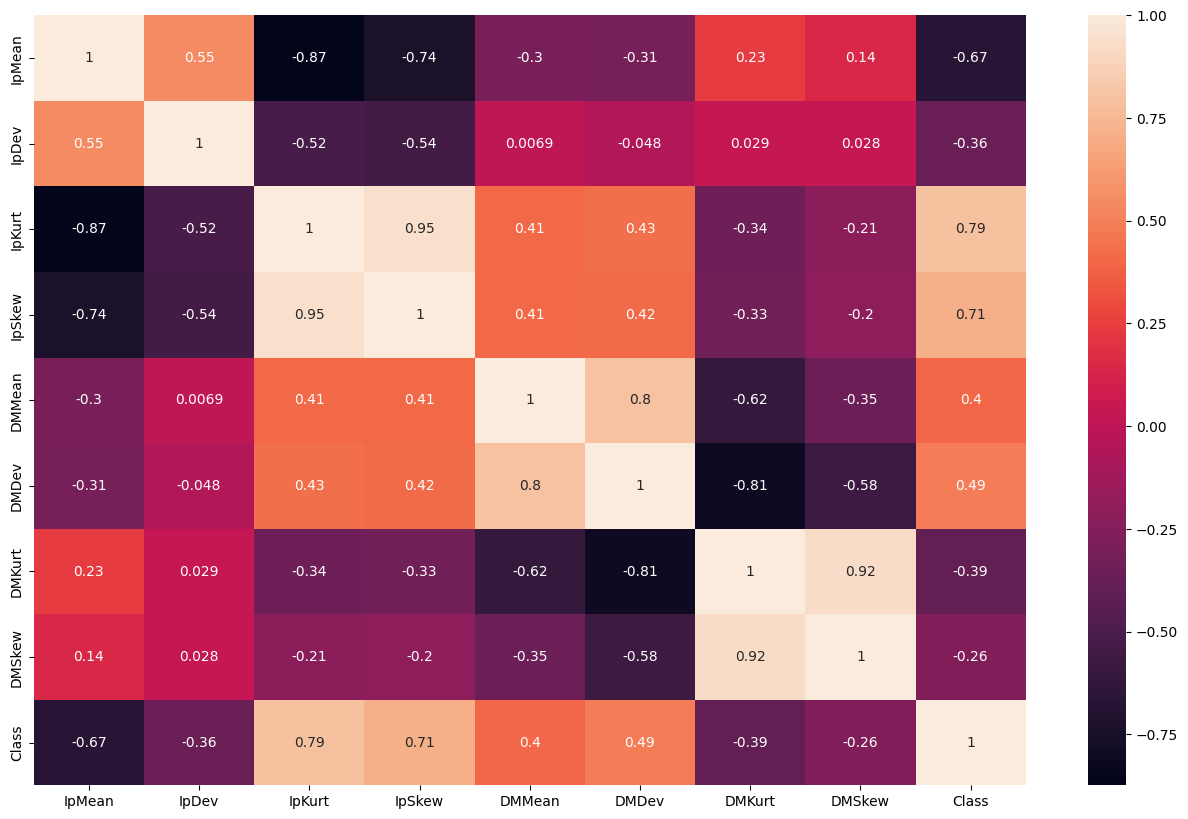

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
fig = px.scatter(df, x="IpSkew", y='IpKurt',log_x=True, width = 1000, color="Class")
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.show()

In [ ]:
fig = px.scatter(df, x="IpDev", y='DMDev',log_x=True, width = 1000, color="Class")
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.show()

In [ ]:
# IpMean
print('1:\n',df['IpMean'].loc[df['Class'] == 1].describe())
print('0:\n',df['IpMean'].loc[df['Class'] == 0].describe())

1:
 count    1639.000000
mean       56.690608
std        30.007707
min         5.812500
25%        31.777344
50%        54.296875
75%        79.277344
max       139.257812
Name: IpMean, dtype: float64
0:
 count    16259.000000
mean       116.562726
std         17.475932
min         17.210938
25%        105.253906
50%        117.257812
75%        128.285156
max        192.617188
Name: IpMean, dtype: float64


In [ ]:
fig = px.scatter(df, x="IpMean", y='DMMean',log_x=True, width = 1000, color="Class")
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.show()

In [ ]:
fig = px.scatter_3d(df, x="IpMean", y='IpKurt', z='IpSkew', log_x=True, width = 1200, color="Class")
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.show()

In [ ]:
fig = px.scatter_3d(df, x="DMMean", y='DMKurt', z='DMSkew', log_x=True, width = 1200, color="Class")
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.show()

# Analysis Results

We can notice that the integrated profile of the pulses mainly describes the Pulsar pattern, being really accurated when classifying the specific star pulses.

By the other hand, the DM-SNR Curve brings confusing patterns that are not the best for classification.

Because of this, we will only be interested in using the integrated profile of the pulses to classify the stars.

# Building the Model

# Random Forest

A random forest is a versatile and powerful machine learning algorithm that combines the predictions of multiple decision trees to make more accurate and robust predictions. It operates by constructing a multitude of decision trees during training, each tree being trained on a random subset of the dataset and employing random feature selection. This diversity in training data and features helps mitigate overfitting and improves generalization. When making predictions, the random forest aggregates the predictions of all individual trees, either through majority voting for classification tasks or averaging for regression tasks, resulting in a more reliable and stable model with strong predictive performance, resistance to outliers, and the ability to capture complex relationships in the data.


In [ ]:
x = df[df.columns[:4]].values
y = df[df.columns[-1]].values

In [ ]:
# normalizing data
scaler = StandardScaler()
x = scaler.fit_transform(x)
lab = LabelEncoder()
y = lab.fit_transform(y)

In [ ]:
# building the training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
# building the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [ ]:
# classifying stars
y_hat = model.predict(x_test)

# Testing the model

Through the results below, we can see that the model successfully predicts the classification of Pulsars with a precision of 97,88%.
The confusion matrix identifies the True Positive/False Positive/True Negative/False Negative classifications, where our model exceeds in predicting confidence.

In [ ]:
# accuracy score
accuracy_score(y_test, y_hat)

0.978838665989504

[[5356   25]
 [ 100  426]]


<Axes: >

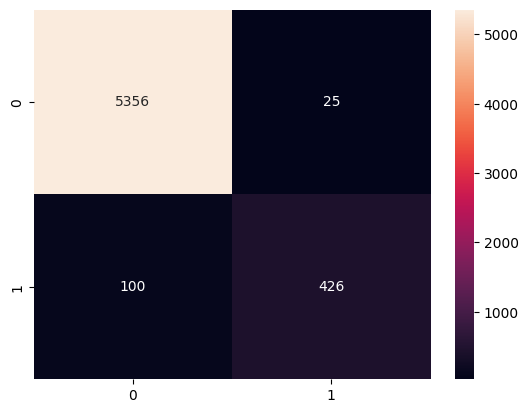

In [ ]:
print(confusion_matrix(y_test, y_hat))
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='d')


# Conclusion

The relationship between data science and astrophysics has ushered in a new era of discovery and understanding in the cosmos. The importance of data science in astrophysics cannot be overstated, as it empowers astronomers and researchers to explore the universe within vast datasets. From the identification of distant galaxies to the discovery of exoplanets and the confirmation of gravitational waves, data science techniques have revolutionized the way we explore and comprehend the cosmos. As our instruments and observations become more sophisticated, data science will continue to play a pivotal role in transforming raw data into profound insights, ultimately expanding the boundaries of human knowledge and deepening our connection to the wonders of the universe.

# Author

Rubén Acevedo is a data scientist with a passion for the idea of using technology to address critical challenges in the fields of Science, Economics, Social Causes and Healthcare.

You can contact me through my email ruben.fernando@pucpr.edu.br if you find it necessary :)

Thank you!

Rubén Acevedo